In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [53]:
data_dir = Path("C:/Adhrit_066/FullIJCNN2013")
image_dir = os.path.join(data_dir)
gt_file = Path("C:\Adhrit_066\FullIJCNN2013\gt.txt")

grd_truth = []
with open(gt_file, "r") as file:
    for line in file:
        data = line.strip().split(",")
        filename = data[0]
        leftCol = int(data[1])
        topRow = int(data[2])
        rightCol = int(data[3])
        bottomRow = int(data[4])
        classID = int(data[5])
        grd_truth.append([filename, (leftCol, topRow, rightCol, bottomRow), classID])

grd_truth

[['00000.ppm', (774, 411, 815, 446), 11],
 ['00001.ppm', (983, 388, 1024, 432), 40],
 ['00001.ppm', (386, 494, 442, 552), 38],
 ['00001.ppm', (973, 335, 1031, 390), 13],
 ['00002.ppm', (892, 476, 1006, 592), 39],
 ['00003.ppm', (742, 443, 765, 466), 4],
 ['00003.ppm', (742, 466, 764, 489), 9],
 ['00003.ppm', (737, 412, 769, 443), 21],
 ['00004.ppm', (898, 342, 967, 409), 21],
 ['00004.ppm', (906, 407, 955, 459), 2],
 ['00005.ppm', (1172, 164, 1284, 278), 9],
 ['00006.ppm', (926, 350, 989, 414), 2],
 ['00007.ppm', (825, 406, 864, 445), 9],
 ['00008.ppm', (785, 460, 811, 486), 2],
 ['00008.ppm', (779, 424, 816, 461), 12],
 ['00009.ppm', (925, 466, 949, 490), 4],
 ['00010.ppm', (1193, 358, 1269, 436), 12],
 ['00011.ppm', (720, 338, 770, 398), 1],
 ['00011.ppm', (710, 265, 780, 342), 21],
 ['00012.ppm', (979, 364, 1034, 418), 1],
 ['00013.ppm', (1043, 281, 1120, 356), 2],
 ['00014.ppm', (712, 492, 732, 511), 21],
 ['00015.ppm', (770, 426, 808, 462), 25],
 ['00016.ppm', (901, 421, 959, 478)

In [54]:
gt_array = np.array(grd_truth,dtype=object)
gt_array

array([['00000.ppm', (774, 411, 815, 446), 11],
       ['00001.ppm', (983, 388, 1024, 432), 40],
       ['00001.ppm', (386, 494, 442, 552), 38],
       ...,
       ['00898.ppm', (323, 504, 355, 536), 4],
       ['00898.ppm', (817, 510, 849, 542), 4],
       ['00899.ppm', (864, 484, 921, 534), 24]], dtype=object)

In [55]:
df = pd.DataFrame(gt_array, columns=["Filename","Dimensions","ClassID"])
df

,Filename,Dimensions,ClassID
0,00000.ppm,"(774, 411, 815, 446)",11
1,00001.ppm,"(983, 388, 1024, 432)",40
2,00001.ppm,"(386, 494, 442, 552)",38
3,00001.ppm,"(973, 335, 1031, 390)",13
4,00002.ppm,"(892, 476, 1006, 592)",39
...,...,...,...
1208,00896.ppm,"(808, 412, 846, 450)",15
1209,00897.ppm,"(804, 526, 828, 550)",42
1210,00898.ppm,"(323, 504, 355, 536)",4
1211,00898.ppm,"(817, 510, 849, 542)",4


In [56]:
from PIL import Image
features = []
for filename, dim, _ in gt_array:
    img = Image.open(os.path.join(image_dir, filename))
    width, height = img.size
    y1, y2, x1, x2 = max(0, dim[1]), min(height, dim[3]), max(0, dim[0]), min(width, dim[2])
    img = img.crop((x1, y1, x2, y2))
    img = img.resize((30,30))
    img_arr = np.array(img)
    features.append(img_arr)
    
features

[array([[[ 96, 109,  85],
         [115, 107,  97],
         [114, 102, 101],
         ...,
         [ 84,  81,  66],
         [ 86,  84,  66],
         [ 95,  89,  72]],
 
        [[ 69,  83,  60],
         [107,  92,  77],
         [114, 101,  91],
         ...,
         [ 93,  87,  73],
         [ 90,  86,  71],
         [ 86,  82,  66]],
 
        [[ 73,  82,  63],
         [ 87,  82,  67],
         [ 85,  78,  63],
         ...,
         [ 88,  86,  72],
         [ 92,  91,  76],
         [ 91,  87,  71]],
 
        ...,
 
        [[ 51,  46,  40],
         [119,  96,  81],
         [169, 101,  68],
         ...,
         [126,  44,  36],
         [131,  46,  30],
         [140,  83,  67]],
 
        [[ 68,  56,  60],
         [156,  84,  79],
         [161,  58,  21],
         ...,
         [193, 114, 108],
         [170, 115, 105],
         [165, 124, 112]],
 
        [[ 65,  57,  76],
         [145,  92, 106],
         [170,  83,  53],
         ...,
         [253, 244, 243],
  

In [57]:
labels = df["ClassID"]
labels

0       11
1       40
2       38
3       13
4       39
        ..
1208    15
1209    42
1210     4
1211     4
1212    24
Name: ClassID, Length: 1213, dtype: object

In [58]:
len(features), len(labels)

(1213, 1213)

In [59]:
labels = list(labels.values)

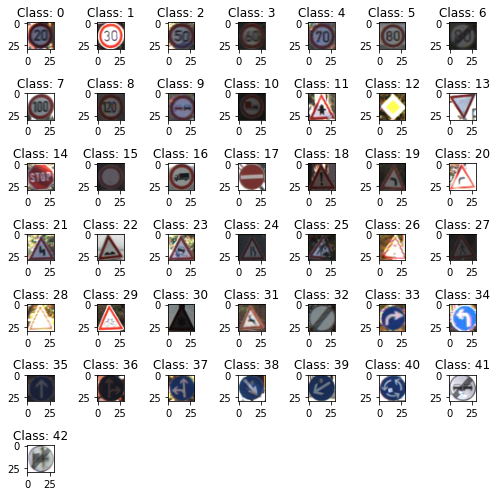

In [60]:
# Plot image
import math

num_class, num_subplots = len(np.unique(labels)), 7
num_rows = math.ceil(num_class/num_subplots)

fig, axes = plt.subplots(num_rows,num_subplots, figsize=(7,num_rows))

for ind, class_label in enumerate(np.unique(labels)):
    sample = features[labels.index(class_label)]
    ax = axes[ind // num_subplots, ind % num_subplots]
    ax.imshow(sample)
    ax.set_title(f"Class: {class_label}")
    
for ax in axes.flatten():
    if not ax.images:
        ax.axis("off")

plt.tight_layout()
plt.show()

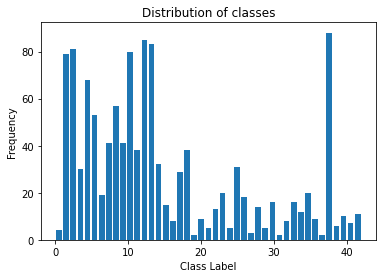

In [40]:
# Plot distribution of classes
plt.hist(labels, bins=num_class, rwidth=0.8)
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Distribution of classes")
plt.show()

In [41]:
# Normalize the features
features = np.array(features) / 255.0

In [42]:
features

array([[[[0.37647059, 0.42745098, 0.33333333],
         [0.45098039, 0.41960784, 0.38039216],
         [0.44705882, 0.4       , 0.39607843],
         ...,
         [0.32941176, 0.31764706, 0.25882353],
         [0.3372549 , 0.32941176, 0.25882353],
         [0.37254902, 0.34901961, 0.28235294]],

        [[0.27058824, 0.3254902 , 0.23529412],
         [0.41960784, 0.36078431, 0.30196078],
         [0.44705882, 0.39607843, 0.35686275],
         ...,
         [0.36470588, 0.34117647, 0.28627451],
         [0.35294118, 0.3372549 , 0.27843137],
         [0.3372549 , 0.32156863, 0.25882353]],

        [[0.28627451, 0.32156863, 0.24705882],
         [0.34117647, 0.32156863, 0.2627451 ],
         [0.33333333, 0.30588235, 0.24705882],
         ...,
         [0.34509804, 0.3372549 , 0.28235294],
         [0.36078431, 0.35686275, 0.29803922],
         [0.35686275, 0.34117647, 0.27843137]],

        ...,

        [[0.2       , 0.18039216, 0.15686275],
         [0.46666667, 0.37647059, 0.31764706]

In [43]:
features = np.array([img.flatten() for img in features])

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(970, 243, 970, 243)

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Define classifier
mlp = MLPClassifier()

In [47]:
mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [49]:
y_pred = mlp.predict(X_test)

In [50]:
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")

Accuracy: 0.8847736625514403


In [20]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       1.00      0.93      0.96        14
          2       0.89      0.80      0.84        10
          3       0.91      0.91      0.91        11
          4       1.00      0.88      0.94        17
          5       0.92      1.00      0.96        11
          6       1.00      0.86      0.92         7
          7       0.80      1.00      0.89         8
          8       0.82      0.75      0.78        12
          9       0.80      1.00      0.89         4
         10       1.00      1.00      1.00        22
         11       1.00      1.00      1.00         8
         12       1.00      0.94      0.97        18
         13       1.00      0.92      0.96        13
         14       1.00      1.00      1.00         4
         15       0.75      0.75      0.75         4
         16       1.00      1.00      1.00         1
         17       1.00      1.00      1.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
